In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from scipy.stats import norm

In [12]:
CONFIDENCE = 0.95

def ci_lower_bound(pos, ntot, confidence = CONFIDENCE):
    if ntot == 0:
        return 0
    z = norm.ppf(1-(1-confidence)/2) #for confidence 95%, z = 1.96
    phat = 1.0*pos/ntot
    return (phat + z*z/(2*ntot) - z * np.sqrt((phat*(1-phat)+z*z/(4*ntot))/ntot))/(1+z*z/ntot)

In [13]:
data_Italy = pd.read_csv('./dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv', index_col='data')

In [14]:
data_Italy.tail()

,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
data,,,,,,,,,,,
2020-03-06 18:00:00,ITA,2394,462,2856,1060,3916,620,523,197,4636,36359
2020-03-07 18:00:00,ITA,2651,567,3218,1843,5061,1145,589,233,5883,42062
2020-03-08 18:00:00,ITA,3557,650,4207,2180,6387,1326,622,366,7375,49937
2020-03-09 18:00:00,ITA,4316,733,5049,2936,7985,1598,724,463,9172,53826
2020-03-10 18:00:00,ITA,5038,877,5915,2599,8514,529,1004,631,10149,60761


([<matplotlib.axis.XTick at 0x1a17ec8090>,
 <a list of 16 Text xticklabel objects>)

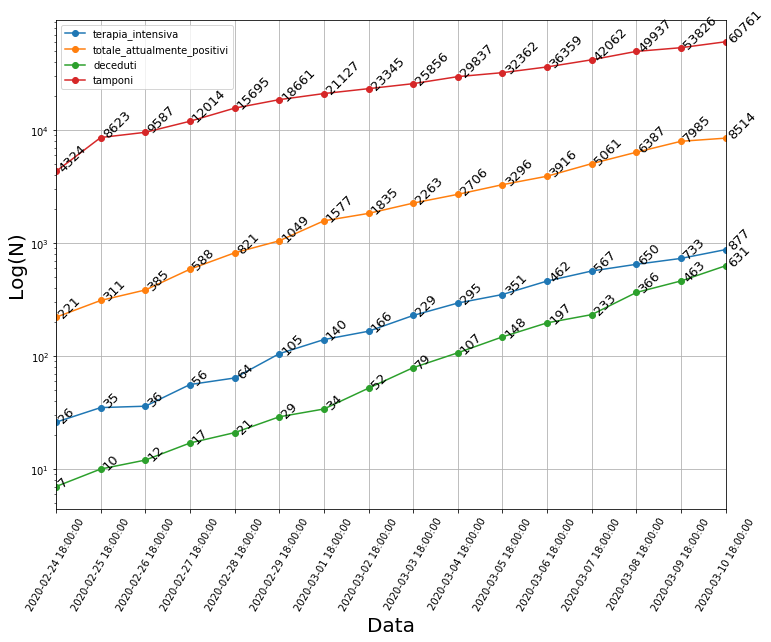

In [15]:
ax = data_Italy[['terapia_intensiva','totale_attualmente_positivi','deceduti','tamponi']].plot(
     figsize=(12,9), logy=True, style='o-', grid=True, rot=60)
ax.set_xlabel("Data", fontsize=20)
ax.set_ylabel("Log(N)", fontsize=20)
for i,v in enumerate(data_Italy['tamponi'].values):
    ax.annotate(str(v),(i,v), rotation = 45, fontsize=13)

for i,v in enumerate(data_Italy['terapia_intensiva'].values):
    ax.annotate(str(v),(i,v), rotation = 45, fontsize=13)
    
for i,v in enumerate(data_Italy['totale_attualmente_positivi'].values):
    ax.annotate(str(v),(i,v), rotation = 45, fontsize=13)
    
for i,v in enumerate(data_Italy['deceduti'].values):
    ax.annotate(str(v),(i,v), rotation = 45, fontsize=13) 

plt.xticks(range(len(data_Italy.index)), data_Italy.index)

In [16]:
data_Italy_elab = pd.DataFrame(data_Italy)
data_Italy_elab['terapia_intensiva_s1'] = data_Italy_elab['terapia_intensiva'].shift(1)
data_Italy_elab['deceduti_s1'] = data_Italy_elab['deceduti'].shift(1)
data_Italy_elab['terapia_intensiva_ratio'] = data_Italy_elab['terapia_intensiva']/data_Italy_elab['terapia_intensiva_s1']
data_Italy_elab['deceduti_ratio'] =  data_Italy_elab['deceduti']/data_Italy_elab['deceduti_s1']
data_Italy_elab.tail()

,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_attualmente_positivi,nuovi_attualmente_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,terapia_intensiva_s1,deceduti_s1,terapia_intensiva_ratio,deceduti_ratio
data,,,,,,,,,,,,,,,
2020-03-06 18:00:00,ITA,2394,462,2856,1060,3916,620,523,197,4636,36359,351.0,148.0,1.316239,1.331081
2020-03-07 18:00:00,ITA,2651,567,3218,1843,5061,1145,589,233,5883,42062,462.0,197.0,1.227273,1.182741
2020-03-08 18:00:00,ITA,3557,650,4207,2180,6387,1326,622,366,7375,49937,567.0,233.0,1.146384,1.570815
2020-03-09 18:00:00,ITA,4316,733,5049,2936,7985,1598,724,463,9172,53826,650.0,366.0,1.127692,1.265027
2020-03-10 18:00:00,ITA,5038,877,5915,2599,8514,529,1004,631,10149,60761,733.0,463.0,1.196453,1.362851


([<matplotlib.axis.XTick at 0x1a17bb4390>,
 <a list of 16 Text xticklabel objects>)

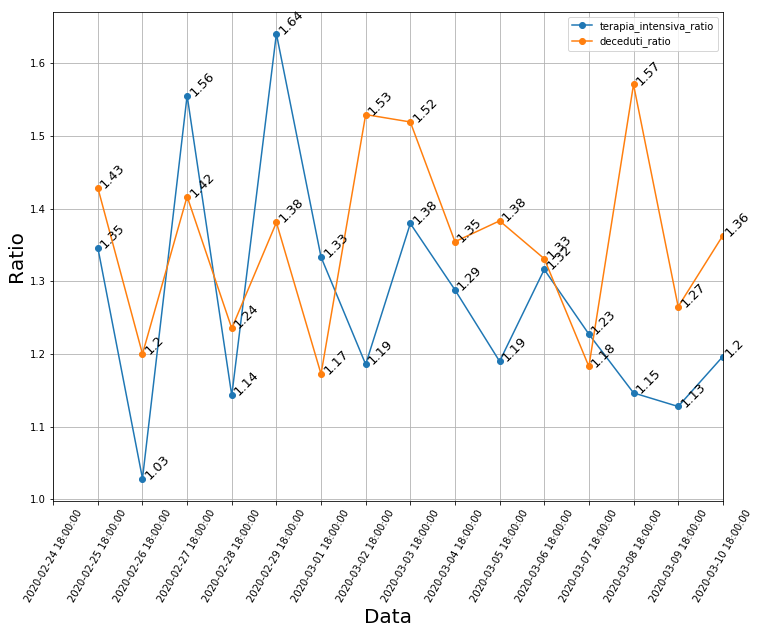

In [10]:
ax = data_Italy[['terapia_intensiva_ratio','deceduti_ratio']].plot(
     figsize=(12,9), style='o-', grid=True, rot=60)
ax.set_xlabel("Data", fontsize=20)
ax.set_ylabel("Ratio", fontsize=20)

for i,v in enumerate(data_Italy['terapia_intensiva_ratio'].values):
    ax.annotate(str(round(v,2)),(i,v), rotation = 45, fontsize=13)
    
for i,v in enumerate(data_Italy['deceduti_ratio'].values):
    ax.annotate(str(round(v,2)),(i,v), rotation = 45, fontsize=13) 

plt.xticks(range(len(data_Italy.index)), data_Italy.index)

In [17]:
ci_lower_bound(6387,49937)

0.1250004967020948

In [18]:
ci_lower_bound(221,4324)

0.04493538340070332